In [3]:
import numpy as np
class case_3():
    def __init__(self):
        #carnot efficiency
        self.n_c  = np.array([0.9,0.8,0.7,0.1])[-2]
        #second type
        self.n_c2 = np.arange(1e-3,1,0.02)
        #temperatures
        self.b_l  = 1/np.append(np.linspace(300,15,50),np.linspace(15,1.5,50))
        
        
        self.b_h  = (1-self.n_c)*self.b_l
        
        # eigen energies
        self.w10 = 20
        self.w2w1 = 2.6
        
        # lambda/w10
        self.lw = np.linspace(1e-3,np.sqrt(self.w2w1),100)
        # instantaneous eigen energies
        self.e_20 = self.w10*((1+self.w2w1 )/2 + np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        self.e_10 = self.w10*((1+self.w2w1 )/2 - np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        #lindblad constants
        self.g_l  = 100
        #self.g_h  = np.array([self.g_l,self.g_l*0.5,self.g_l*0.2])
        self.g_h  = self.g_l*5
        self.g    = (self.g_l+ self.g_h)/2
        #cosine data
        self.c    = (self.w2w1 -1 )/(2*np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2 ))
        #case_3 (eta_c)
        
        self.GA = (self.g/(self.e_20-self.e_10))**2
        

    def H(self):
        H_3 =[]
        for value in range(len(self.b_l)):
            H_3.append( (np.exp(-self.b_l[value]*self.e_20 )-np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)-np.exp(-self.b_l[value]*self.e_10 ) )\
                        /(1/2*(2+ np.exp(-self.b_l[value]*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l[value]*self.e_10 ) )) )
                #print(step)
        return H_3
    def I(self):
        I_3= []
        for value in range(len(self.b_l)):
            I_3.append( ((1+np.exp(-self.b_l[value]*self.e_20)+np.exp(-self.b_h[value]*self.e_20) )/(self.g_l)\
                        +(1+np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l[value]*self.e_10 ))/self.g_h)\
                        /(1/2*(2+ np.exp(-self.b_l[value]*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l[value]*self.e_10 ) ))) 
        return I_3
    def J(self):
        J_3 =[]
        for value in range(len(self.b_l)):
            J_3.append( ((np.exp(-self.b_l[value]*self.e_20)-np.exp(-self.b_h[value]*self.e_20))/self.g_l \
                        +(np.exp(-self.b_h[value]*self.e_10)-np.exp(-self.b_l[value]*self.e_10))/self.g_h )\
                        /(1/2*(2+ np.exp(-self.b_l[value]*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l[value]*self.e_10 ) )))
        return J_3
var =case_3()





In [4]:
#case 2
def power_l2(var,index):
    c = var.c
    b_l= var.b_l[index]
    b_h= var.b_h[index]
    H  = var.H()[index]
    I  = var.I()[index]
    J  = var.J()[index]
    
    
    power_l2 = ( (var.e_20-var.e_10) *((1 + var.GA)*(1- c**2)*\
                (((1-c )/2 )*(np.exp(-b_l*var.e_20)-np.exp(-b_h*var.e_10) )\
                +((1+c )/2 )*(np.exp(-b_h*var.e_20)-np.exp(-b_l*var.e_10) )) ))\
                /((2+np.exp(-b_l*var.e_20)+np.exp(-b_h*var.e_20)\
                +np.exp(-b_l*var.e_10)+np.exp(-b_h*var.e_10))\
                *( (var.GA/var.g)*c**2 - ((var.GA)/(2*var.g))*H*c**3\
                + ((1-c**2)/2)*(1+ var.GA)*(I-J*c) ))
   
    # eliminate unwanted values
    return power_l2


In [5]:
var3 = case_3()
def POWER_beta(var):
    POWER=[]
    for value in range(len(var.b_l)):
        POWER.append(power_l2(var3,value))
    return POWER
        
PO= POWER_beta(var3)



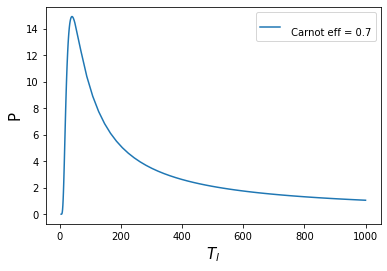

In [6]:
import matplotlib.pyplot as plt
def PO_max(p):
    result =[]
    for element in p:
        result.append(max(element))
    return result
y = PO_max(PO)
#y1 = EFF_max(EFF)
plt.plot(1/var3.b_h,y,label='\n Carnot eff = %.1f'%(var3.n_c) )
#plt.scatter(1/var3.b_l[y==max(y)] , max(y),label= r'$T_l^*= %.2f$'%(1/var3.b_l[y==max(y)])\
 #          +'\n'+r' $P_{max}= %.2f$'%(max(y)))
#plt.scatter(1/var3.b_l[y==min(y)] , min(y),label= r'$T_l^*= %.2f$'%(1/var3.b_l[y==min(y)])\
      #     +'\n'+r' $P_{max}= %.2f$'%(min(y)))
#plt.scatter(1/var3.b_l[y1==max(y1)],y[y1.index(max(y1))] )
plt.xlabel(r'$T_l$',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend()


In [6]:

def n_l2(var,power,index):
    b_l= var.b_l[index]
    b_h= (1-var.n_c)*var.b_l[index]
    c = var.c
    p = power[index]
    eta_0 =  (1 - (var.e_10)/(var.e_20))/(1 - ((1-c)/2)*(1+ var.e_10/var.e_20 ))
    p_0   =  var.g_l*var.e_10*((1-c**2)/4)*(np.exp(-b_h*var.e_10)-np.exp(-b_l*var.e_10) ) \
            +var.g_h*var.e_20*((1-c**2)/4)*(np.exp(-b_h*var.e_20)-np.exp(-b_l*var.e_20) )
    om_s  = ((var.e_20-var.e_10)**2 +var.g**2)/((var.e_20-var.e_10)*c)
    rho_0 =  (((1-c**2)*om_s)/var.g_l+((1-c**2)*om_s)/var.g_h + (2*var.g*c)/(var.e_20-var.e_10) ) \
            /( (1+ (1-c)*np.exp(-b_l*var.e_20) +(1+c)*np.exp(-b_h*var.e_20) )\
              *( ((1-c**2)*om_s)/var.g_l+(var.g*c)/(var.e_20-var.e_10))\
             +( (1+ (1+c)*np.exp(-b_l*var.e_10) +(1-c)*np.exp(-b_h*var.e_10) )\
              *( ((1-c**2)*om_s)/var.g_h+(var.g*c)/(var.e_20-var.e_10))))
   
    n = eta_0*((p))/(p+ eta_0*rho_0*p_0 )
    return n


In [7]:
def EFF_beta(var,power):
    E=[]
    for value in range(len(var.b_l)):
        E.append(n_l2(var3,power,value))
    return E
 
EFF = EFF_beta(var3,PO)    



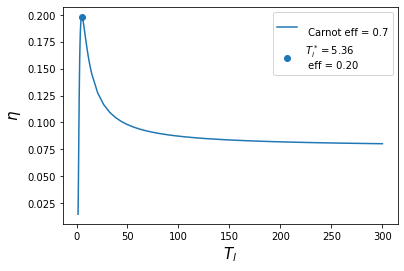

In [8]:
def EFF_max(p):
    result =[]
    for element in p:
        element= element[[1>value >-1 for value in element ]]
        result.append(max(element))
    return result


y = EFF_max(EFF)
plt.plot(1/var3.b_l,y,label='\n Carnot eff = %.1f'%(var3.n_c) )
plt.scatter(1/var3.b_l[y==max(y)] , max(y),label= r'$T_l^*= %.2f$'%(1/var3.b_l[y==max(y)])\
           +'\n eff = %.2f'%(max(y)))
plt.xlabel(r'$T_l$',fontsize=15)
plt.ylabel(r'$\eta$',fontsize=15)
#plt.ylim(-1,1)
plt.legend()

(0.0, 1.0)

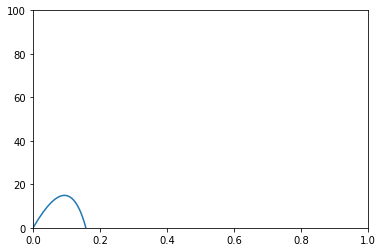

In [9]:
plt.plot(EFF[-40],PO[-40])
plt.ylim(0,100)
plt.xlim(0,1)

In [10]:
plt.plot(EFF_3,PO_3,label= 'Carnot eff = %.2f'%(var3.n_c))
plt.ylim(0,max(PO_3)+1)
plt.xlim(-0,EFF_3[PO_3==min(PO_3[PO_3>0])]+0.1)
plt.xlabel(r'$\eta$',fontsize=18)
plt.ylabel(r'$P$',fontsize=18)
#plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(EFF_3[PO_3==max(PO_3)], max(PO_3),label= r'$P_{max} \;\;=$'+'%.4f'%(max(PO_3))\
            +'\n'+r'$\eta^*= %.3f \eta_{max}$'%(EFF_3[PO_3==max(PO_3)]/max(EFF_3)))
plt.legend()

EFF_3[PO_3==min(PO_3[PO_3>0])]

NameError: name 'EFF_3' is not defined

In [79]:
import json 

dic = { 'eff':list(EFF),'power': list(PO), 'lw':list(var3.lw)\
        ,'c':list(var3.c) }

dic_bl= {'T_l':list(1/var3.b_l), 'P_max':list(y),'eff_max':list(y1)}

In [86]:
import pickle
with open('L2_n_c_'+'%.f'%(var3.n_c)+'_%.1fto'%(1/var3.b_l[0])+'%.2f'%(1/var3.b_l[-1])+'.json','wb') as f:
    pickle.dump(dic,f)
with open('L2_n_c_'+'max_'+'%.f'%(var3.n_c)+'_%.1fto'%(1/var3.b_l[0])+'%.2f'%(1/var3.b_l[-1])+'.json','wb') as f:
    pickle.dump(dic_bl,f)